# Air Quality Analysis – First Model
This notebook contains the first model for predicting Air Quality Index (AQI) using US EPA AirNow data.


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset
Load the US EPA AirNow dataset and inspect its structure, basic statistics, and missing values.


In [2]:
# Load the dataset
data = pd.read_csv('../data/air_quality.csv')

# Check the first few rows
data.head()


,EPA AQS ID,Country Code,Data Source,EPA Region,Elevation,GMT Offset Amount (hours),Latitude,Local Time at Monitor,Longitude,OZONE,...,PM2.5 & PM10 AQI (For Sorting),Reporting Area(s),Site Name,State Name,Site Operational Status,ValidTime,ObjectId,MonitorType,x,y
0,060530002,US,Monterey Bay Unified APCD,R9,200.1,-8,36.481870,2026-01-27 06:00:00 GMT-8,-121.733330,25.0,...,-999,Carmel Valley,Carmel Valley AMS,CA,Active,1/27/2026 2:00:00 PM,556338936,Permanent,-1.355129e+07,4.367130e+06
1,060531003,US,Monterey Bay Unified APCD,R9,10.1,-8,36.694261,2026-01-27 06:00:00 GMT-8,-121.623271,24.0,...,18,Salinas,Salinas AMS,CA,Active,1/27/2026 2:00:00 PM,556338938,Permanent,-1.353904e+07,4.396576e+06
2,060570005,US,Northern Sierra AQMD,R9,0.0,-8,39.234402,2026-01-27 06:00:00 GMT-8,-121.055603,NaN,...,-999,Western Nevada County,Grass Valley,CA,Active,1/27/2026 2:00:00 PM,556338957,Permanent,-1.347585e+07,4.755303e+06
3,060571001,US,Northern Sierra AQMD,R9,0.0,-8,39.327852,2026-01-27 06:00:00 GMT-8,-120.184617,NaN,...,-999,Truckee,Truckee BAM,CA,Active,1/27/2026 2:00:00 PM,556338959,Permanent,-1.337889e+07,4.768743e+06
4,060590008,US,South Coast AQMD,R9,0.0,-8,33.819305,2026-01-27 06:00:00 GMT-8,-117.918759,NaN,...,-999,Central Orange,Anaheim Near Road,CA,Active,1/27/2026 2:00:00 PM,556338961,Permanent,-1.312666e+07,4.004565e+06


<class 'pandas.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EPA AQS ID                       488 non-null    str    
 1   Country Code                     488 non-null    str    
 2   Data Source                      488 non-null    str    
 3   EPA Region                       488 non-null    str    
 4   Elevation                        488 non-null    float64
 5   GMT Offset Amount (hours)        488 non-null    int64  
 6   Latitude                         488 non-null    float64
 7   Local Time at Monitor            488 non-null    str    
 8   Longitude                        488 non-null    float64
 9   OZONE                            192 non-null    float64
 10  Ozone & PM AQI                   318 non-null    float64
 11  Ozone & PM AQI (For Labeling)    488 non-null    str    
 12  Ozone & PM AQI (For Sorting)     

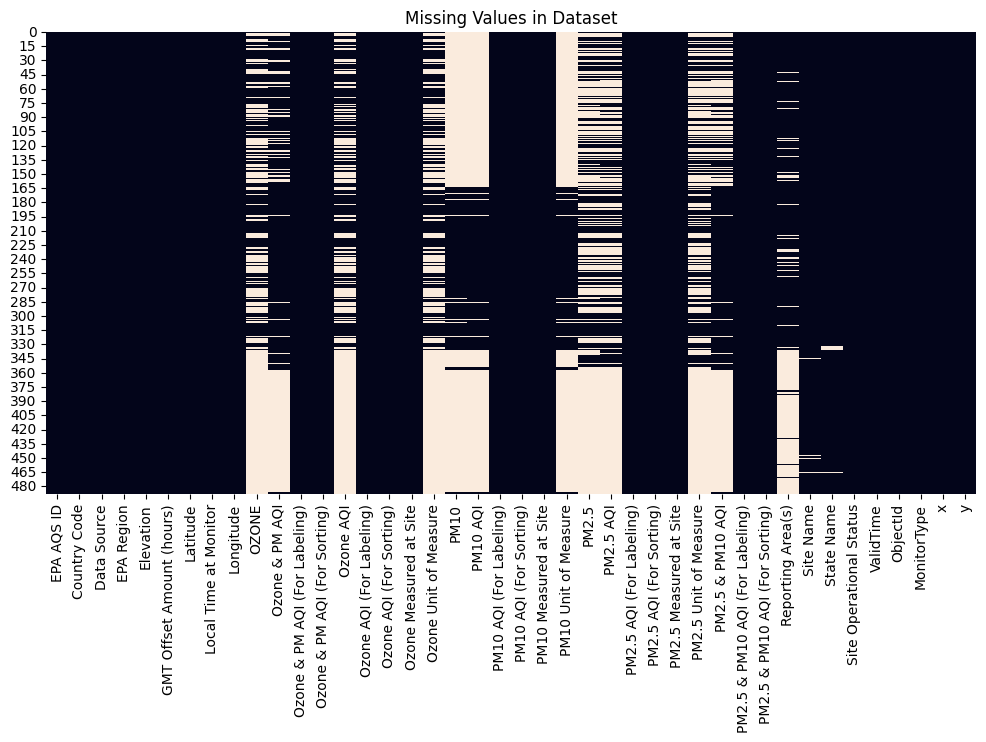

In [ ]:
# Check dataset info
data.info()

# Quick statistics
data.describe()

# Missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

## Feature Selection & Data Cleaning
Select numeric features (`OZONE`, `PM2.5`, `PM10`) and the target (`Ozone & PM AQI`), and drop rows with missing values in these columns.


In [27]:
# Selecting numeric features and target
features = ['OZONE', 'PM2.5', 'PM10']
target = 'Ozone & PM AQI'

# Drop rows with missing values in selected columns
data_clean = data.dropna(subset=features + [target])

# Final feature/target selection
X = data_clean[features]
y = data_clean[target]

# Check shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (75, 3)
Target shape: (75,)


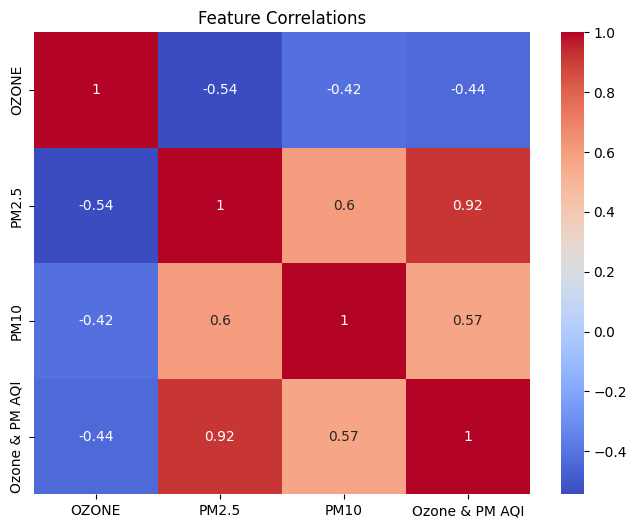

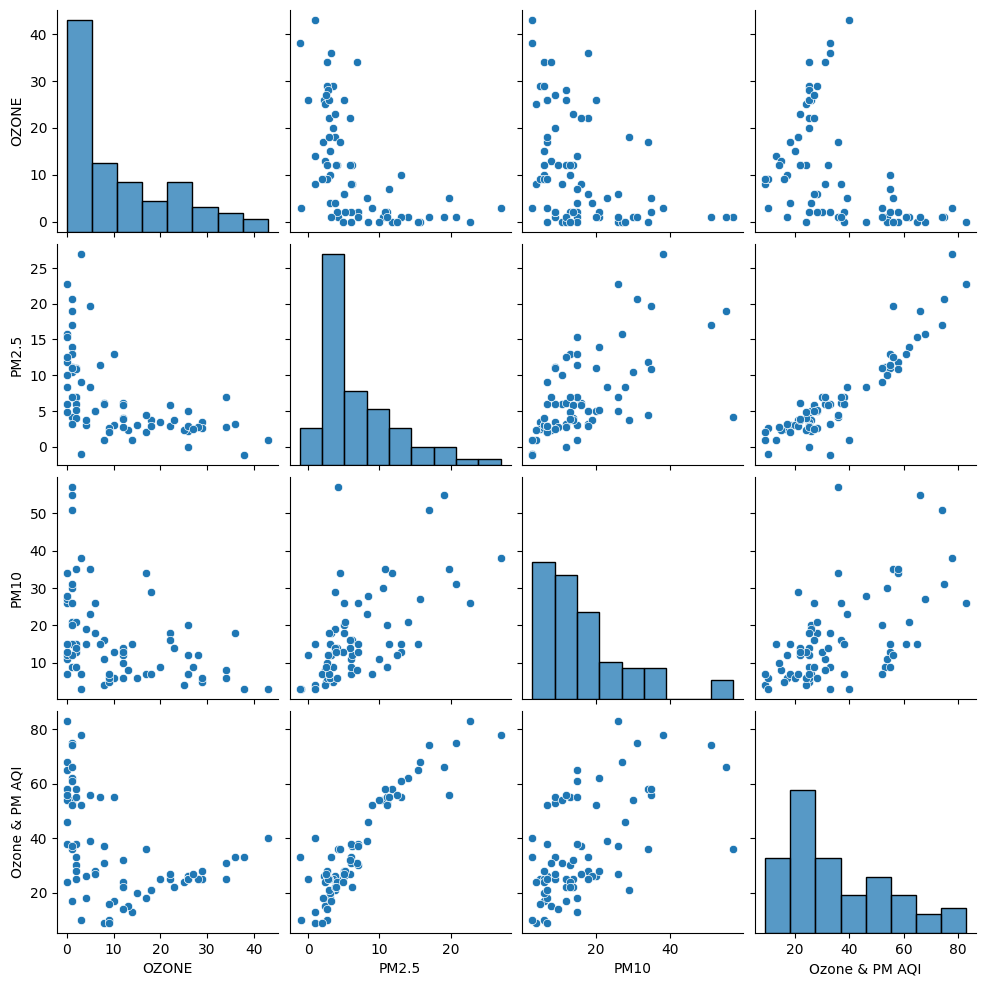

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data_clean[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

sns.pairplot(data_clean[features + [target]])
plt.show()


## Train-Test Split
Split the dataset into training and testing sets (80/20) for model evaluation.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression Model
Train a Linear Regression model to predict AQI based on the selected features.


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


In [19]:
y_pred = lr_model.predict(X_test)


## Model Evaluation
Evaluate the model using Mean Squared Error (MSE) and R² score, and visualize predicted vs actual AQI values.


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 60.78
R2 Score: 0.62


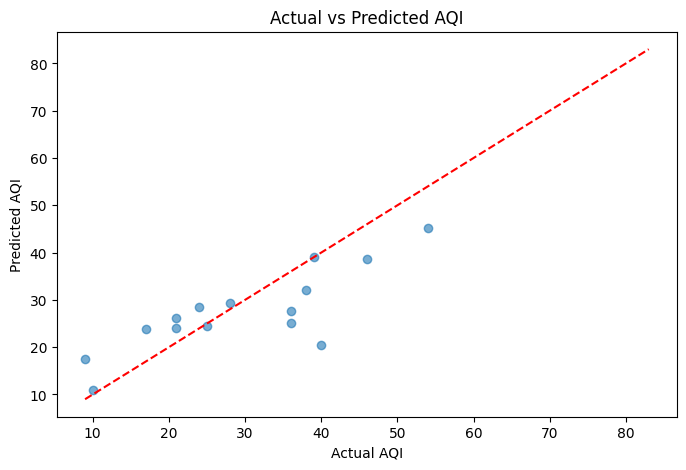

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

### Predictive Data Modeling Plan – Air Quality Analysis

**Objective:** Predict AQI levels using pollutant concentrations (Ozone, PM2.5, PM10).

**Dataset:** US EPA AirNow (updated Feb 2024), collected continuously from multiple monitoring stations across the US.

**Features:**
- OZONE (ppb)
- PM2.5 (µg/m³)
- PM10 (µg/m³)

**Target:**
- Ozone & PM AQI

**Preprocessing:**
- Dropped rows with missing values in features/target
- Explored correlations and distributions

**Model Choice:**
- Linear Regression for numeric AQI prediction
- Simple, interpretable, baseline model for continuous target

**Evaluation Metrics:**
- Mean Squared Error (MSE)
- R² Score

**Next Steps:**
- Consider predicting AQI category (Good/Moderate/Unhealthy) with a classifier
- Experiment with other regression models (Random Forest, Gradient Boosting)

